<a href="https://colab.research.google.com/github/Prateek-Datascientist/16th-Jan-2024/blob/main/MICE_30_Jan_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/bigmart.csv')
df.columns
df2 = df.copy()

Using ***MICE*** function

In [ ]:
df.corr()

<ipython-input-4-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
df['row_no'] = np.arange(len(df))

In [ ]:
df_sub = df.filter( ['Item_Weight'	,'Item_Visibility',	'Item_MRP' , 'Item_Outlet_Sales' , 'row_no'] )

In [ ]:
df_sub.isna().sum()


Item_Weight          1463
Item_Visibility         0
Item_MRP                0
Item_Outlet_Sales       0
row_no                  0
dtype: int64

In [ ]:
import statsmodels as sm
from statsmodels.imputation import mice

In [ ]:
df_m = mice.MICEData(df_sub)
df_m.update_all(50)


In [ ]:
# df_m.isna().sum()    "'MICEData' object has no attribute 'isna'" => We can't read MICEData object directly
print(type(df_m))
print(type(df_sub))

<class 'statsmodels.imputation.mice.MICEData'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
x = df_m.data
print(df_sub.columns)
print(type(df_sub.columns))
df[df_sub.columns ] = x
df.isna().sum()

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'row_no'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
row_no                          0
dtype: int64

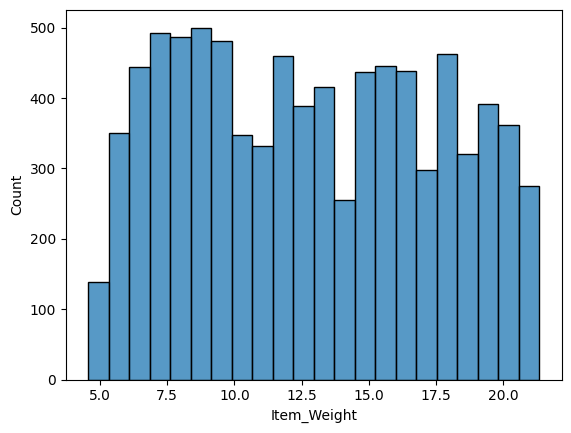

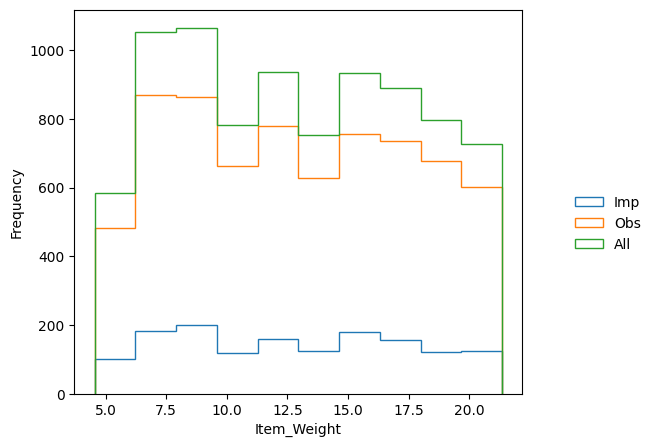

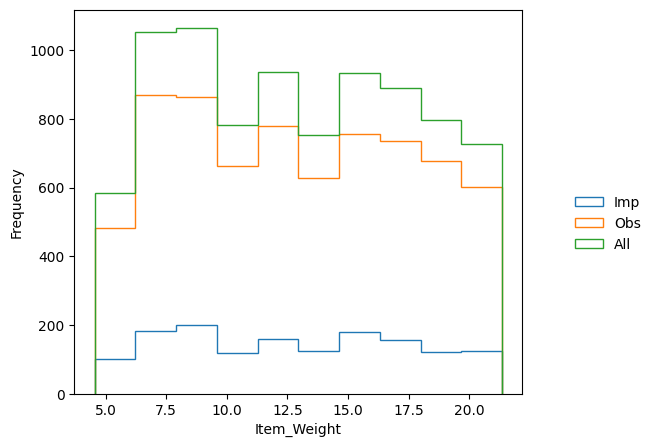

In [ ]:
sns.histplot(df['Item_Weight'])
plt.show()
df_m.plot_imputed_hist('Item_Weight')

In [ ]:
df_sub1 = df2.filter( ['Item_Weight'	,'Item_Visibility',	'Item_MRP' , 'Item_Outlet_Sales'])

df_m1 = mice.MICEData(df_sub1)
df_m1.update_all(100)
x = df_m1.data
df3 = df2.copy()
df2[x.columns]  = x

m2 = df2.Item_Weight.mean()
m1 = df.Item_Weight.mean()
m0 = df3.Item_Weight.mean()
print(m0)
print(m1)
print(m2)

12.857645184135976
12.857645184135976
12.842146544643903


ParserError: Error tokenizing data. C error: Expected 2 fields in line 22, saw 3
